<a href="https://colab.research.google.com/github/JekugaBrandon/diffusion_image_augmentation/blob/master/stablediffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow keras_cv --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 849.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 44.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.


In [2]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


1356917/1356917 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
492466864/492466864 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
3439090152/3439090152 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step
198180272/198180272 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


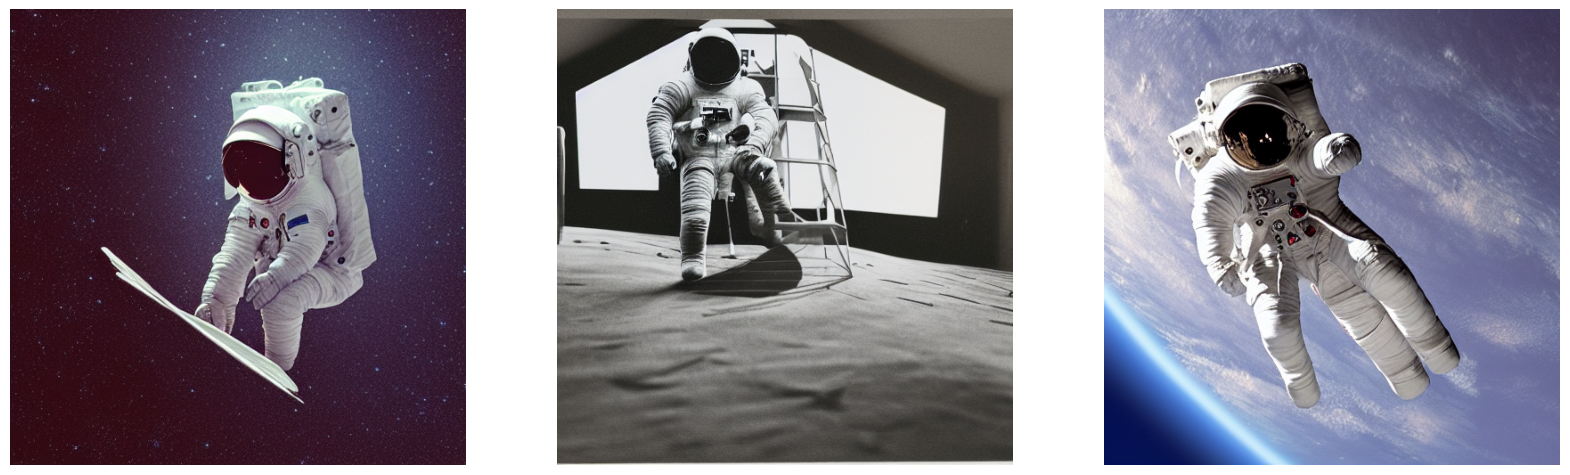

In [4]:
images = model.text_to_image("photograph of an  astronaut riding a house", batch_size=3)


def plot_images(images):
  plt.figure(figsize = (20, 20))
  for i in range(len(images)):
    ax = plt.subplot(1, len(images), i + 1)
    plt.imshow(images[i])
    plt.axis("off")

plot_images(images)

50/50 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step


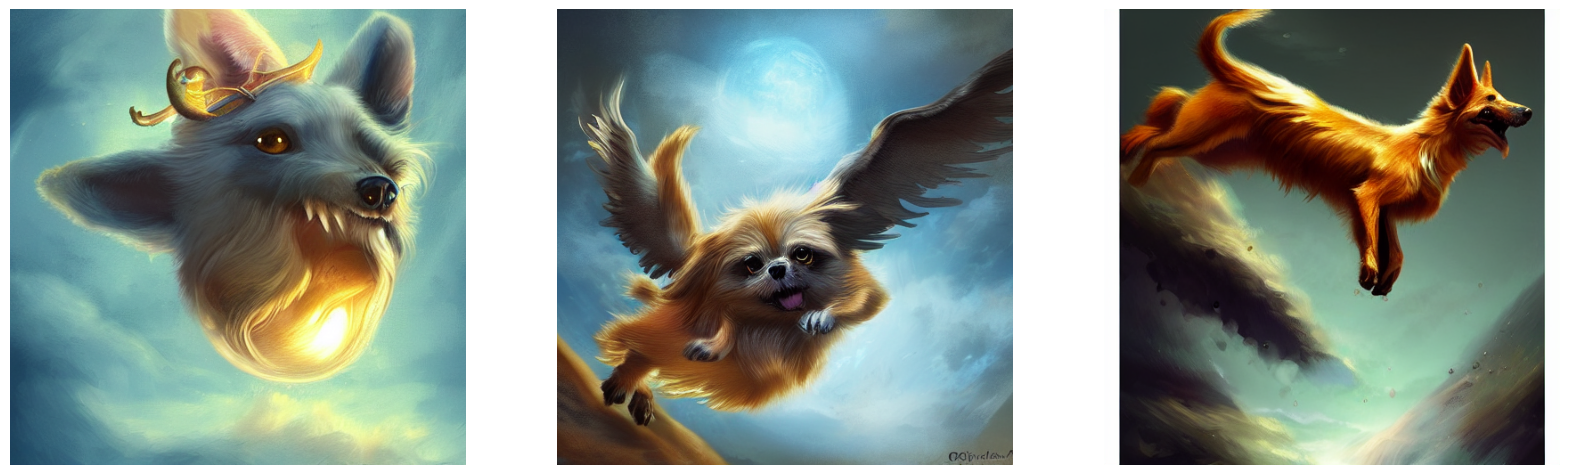

In [8]:
images = model.text_to_image(
    "cute magical flying dog, fantasy art,"
    "golden color, high quality, highly detailed, elegant, sharp focus,"
    "concept art, charater concepts, digital painting, mystery, adventure,",
    batch_size = 3,
)
plot_images(images)

50/50 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step
Standard model: 89.06 seconds


AttributeError: module 'keras._tf_keras.keras.backend' has no attribute 'clear_seesion'

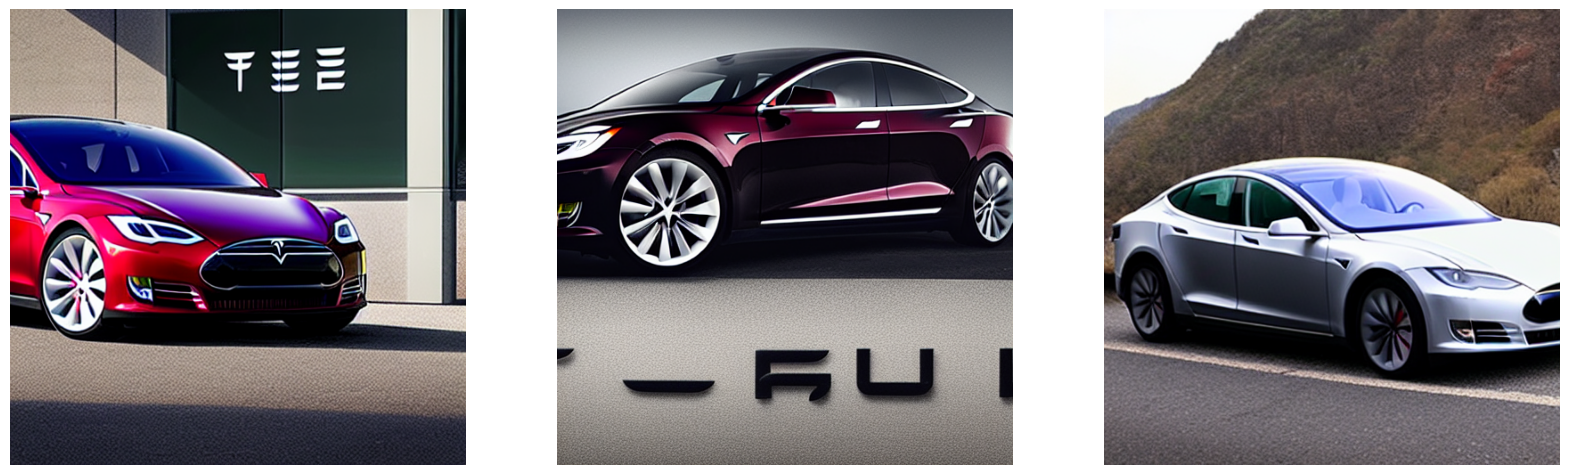

In [10]:
benchmark_result = []
start = time.time()
images = model.text_to_image(
    "A TESLA trading stuck image with an increase in its trading sticks",
    batch_size = 3,
)
end = time.time()
benchmark_result.append(["Standard", end - start])
plot_images(images)

print(f"Standard model: {(end - start):.2f} seconds")
keras.backend.clear_seesion()

In [11]:
keras.mixed_precision.set_global_policy("mixed_float16")

In [12]:
model = keras_cv.models.StableDiffusion()

print("Compute dtype:", model.diffusion_model.compute_dtype)
print(
    "Variable dtype:",
    model.diffusion_model.variable_dtype,
)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
Compute dtype: float16
Variable dtype: float32


50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 588ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 581ms/step
Mixed precision model: 29.63 seconds


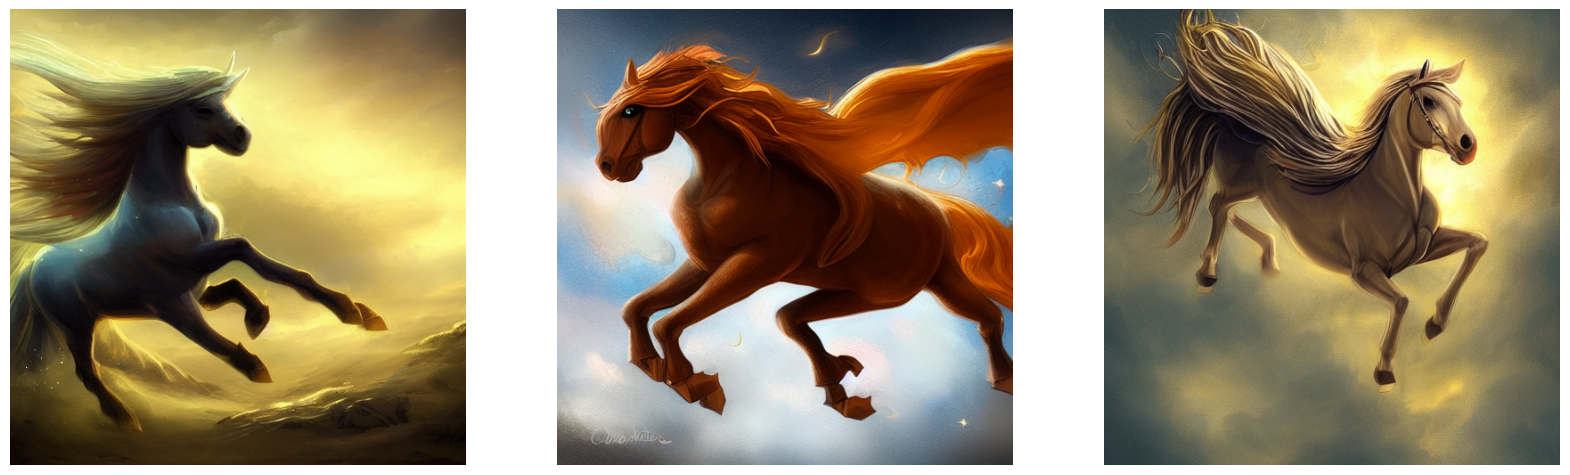

In [13]:
# Warming up model to run graph tracing before benchmark

model.text_to_image("warming up model", batch_size=3)


start = time.time()
images = model.text_to_image(
    "a cute magical flying horse, fantasy art, "
    "golden color, high quality, highly detailde, elegant, sharp focus,"
    "concept art, chaaracter concepts, digital painting, mystery, adventure",
    batch_size=3,
)
end = time.time()
benchmark_result.append(["Mixed Precision", end - start])
plot_images(images)

print(f"Mixed precision model: {(end - start):.2f} seconds")
keras.backend.clear_session()

In [16]:
# setiing back to default for benchmark

keras.mixed_precision.set_global_policy("float32")

model = keras_cv.models.StableDiffusion(jit_compile=True)
images = model.text_to_image("An avocado armchair", batch_size=3)
plot_images(images)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:1474: UserWarning: Layer 'clip_embedding_2' looks like it has unbuilt state, but Keras is not able to trace the layer `call()` in order to build it automatically. Possible causes:
1. The `call()` method of your layer may be crashing. Try to `__call__()` the layer eagerly on some test input first to see if it works. E.g. `x = np.random.random((3, 4)); y = layer(x)`
2. If the `call()` method is correct, then you may need to implement the `def build(self, input_shape)` method on your layer. It should create all variables used by the layer (e.g. by calling `layer.build()` on all its children layers).
Exception encountered: ''Variable res_block_32/group_normalization_88/gamma is already initialized.''
  warnings.warn(


ValueError: Exception encountered when calling CLIPEmbedding.call().

[1mCould not automatically infer the output shape / dtype of 'clip_embedding_2' (of type CLIPEmbedding). Either the `CLIPEmbedding.call()` method is incorrect, or you need to implement the `CLIPEmbedding.compute_output_spec() / compute_output_shape()` method. Error encountered:

Variable res_block_32/group_normalization_88/gamma is already initialized.[0m

Arguments received by CLIPEmbedding.call():
  • args=(['<KerasTensor shape=(None, 77), dtype=int32, sparse=False, ragged=False, name=tokens>', '<KerasTensor shape=(None, 77), dtype=int32, sparse=False, ragged=False, name=positions>'],)
  • kwargs=<class 'inspect._empty'>

In [18]:
start = time.time()
images = model.text_to_image(
    "A cute otter in a rainbow whirlpool holding shells, watercolor",
    batch_size = 1,
)

end = time.time()
benchmark_result.append(["XLA", end - start])
plot_images(images)

print(f"With XLA: {(end - start):.2f} seconds")
keras.backend.clear_session

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:1474: UserWarning: Layer 'clip_embedding_4' looks like it has unbuilt state, but Keras is not able to trace the layer `call()` in order to build it automatically. Possible causes:
1. The `call()` method of your layer may be crashing. Try to `__call__()` the layer eagerly on some test input first to see if it works. E.g. `x = np.random.random((3, 4)); y = layer(x)`
2. If the `call()` method is correct, then you may need to implement the `def build(self, input_shape)` method on your layer. It should create all variables used by the layer (e.g. by calling `layer.build()` on all its children layers).
Exception encountered: ''Variable res_block_32/group_normalization_88/gamma is already initialized.''
  warnings.warn(


ValueError: Exception encountered when calling CLIPEmbedding.call().

[1mCould not automatically infer the output shape / dtype of 'clip_embedding_4' (of type CLIPEmbedding). Either the `CLIPEmbedding.call()` method is incorrect, or you need to implement the `CLIPEmbedding.compute_output_spec() / compute_output_shape()` method. Error encountered:

Variable res_block_32/group_normalization_88/gamma is already initialized.[0m

Arguments received by CLIPEmbedding.call():
  • args=(['<KerasTensor shape=(None, 77), dtype=int32, sparse=False, ragged=False, name=tokens>', '<KerasTensor shape=(None, 77), dtype=int32, sparse=False, ragged=False, name=positions>'],)
  • kwargs=<class 'inspect._empty'>

In [19]:
# assembling all the performance of stable diffusion inferences.

keras.mixed_precision.set_global_policy("mixed_float16")
model = keras_cv.models.StableDiffusion(jit_compile=True)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [20]:
images = model.text_to_image(
    "Teddy bears conducting machine learning research",
)
plot_images(images)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:1474: UserWarning: Layer 'clip_embedding_5' looks like it has unbuilt state, but Keras is not able to trace the layer `call()` in order to build it automatically. Possible causes:
1. The `call()` method of your layer may be crashing. Try to `__call__()` the layer eagerly on some test input first to see if it works. E.g. `x = np.random.random((3, 4)); y = layer(x)`
2. If the `call()` method is correct, then you may need to implement the `def build(self, input_shape)` method on your layer. It should create all variables used by the layer (e.g. by calling `layer.build()` on all its children layers).
Exception encountered: ''Variable res_block_32/group_normalization_88/gamma is already initialized.''
  warnings.warn(


ValueError: Exception encountered when calling CLIPEmbedding.call().

[1mCould not automatically infer the output shape / dtype of 'clip_embedding_5' (of type CLIPEmbedding). Either the `CLIPEmbedding.call()` method is incorrect, or you need to implement the `CLIPEmbedding.compute_output_spec() / compute_output_shape()` method. Error encountered:

Variable res_block_32/group_normalization_88/gamma is already initialized.[0m

Arguments received by CLIPEmbedding.call():
  • args=(['<KerasTensor shape=(None, 77), dtype=int32, sparse=False, ragged=False, name=tokens>', '<KerasTensor shape=(None, 77), dtype=int32, sparse=False, ragged=False, name=positions>'],)
  • kwargs=<class 'inspect._empty'>